### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 356_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,...,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000,7073.000000
mean,0.034629,0.284236,0.713396,1.365186,1.618201,8.781787,1.248174,1.047899,1.015835,1.014066,...,1.883312,1.605899,2.063601,1.978736,0.894479,1.658800,2.069617,1.983060,1.977022,47.262830
std,0.009060,0.010728,0.018663,0.012908,0.016438,2.966889,0.110577,0.010408,0.006174,0.006694,...,0.015300,0.039916,0.018078,0.017268,0.044102,0.018667,0.001941,0.004184,0.006024,14.101008
min,0.006600,0.238718,0.684817,1.223371,1.466917,2.246951,1.122172,0.997039,1.005443,0.998079,...,1.830662,1.477491,1.939137,1.918994,0.524498,1.584853,2.064267,1.964838,1.960228,25.500000
25%,0.030905,0.279866,0.700225,1.356348,1.606955,7.348860,1.213347,1.042931,1.012605,1.008079,...,1.874627,1.584309,2.063820,1.969707,0.885572,1.648510,2.068288,1.980424,1.973142,39.100000
50%,0.033153,0.284276,0.705725,1.362439,1.614749,8.087451,1.227815,1.046088,1.017400,1.016382,...,1.884908,1.611972,2.067635,1.980859,0.901678,1.659299,2.069282,1.983125,1.976742,41.200000
75%,0.035612,0.290552,0.727980,1.372293,1.629991,9.213411,1.246306,1.050622,1.019194,1.018655,...,1.893813,1.632878,2.070262,1.989920,0.915985,1.669752,2.070518,1.985731,1.979998,51.600000
max,0.071322,0.316499,0.786077,1.407762,1.670740,45.773318,2.411963,1.105992,1.130002,1.099763,...,1.923324,1.707979,2.076885,2.028829,0.975852,1.721038,2.075506,1.996439,1.998571,97.300000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

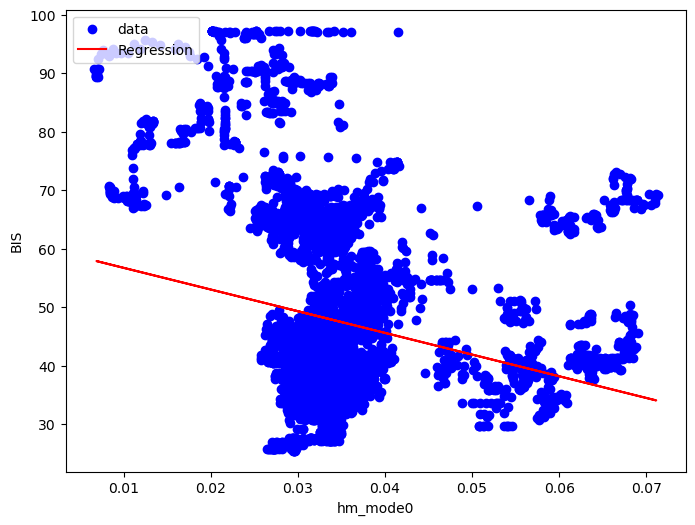

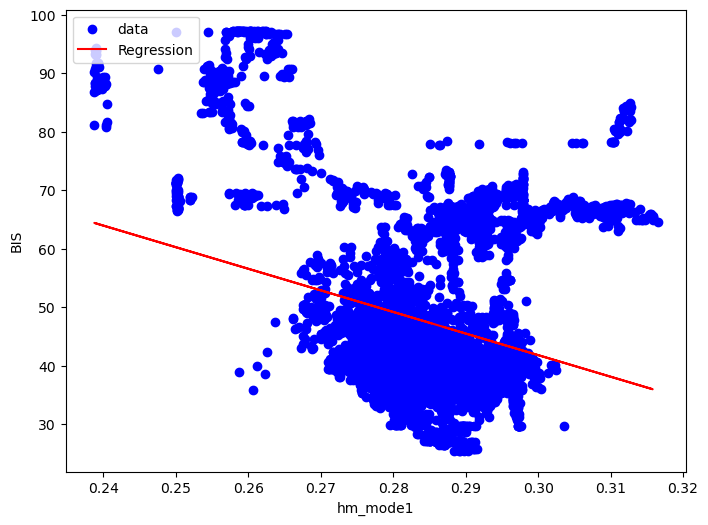

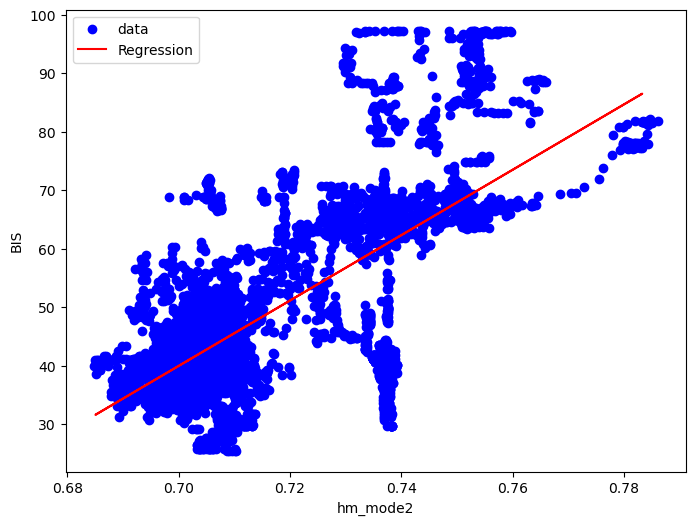

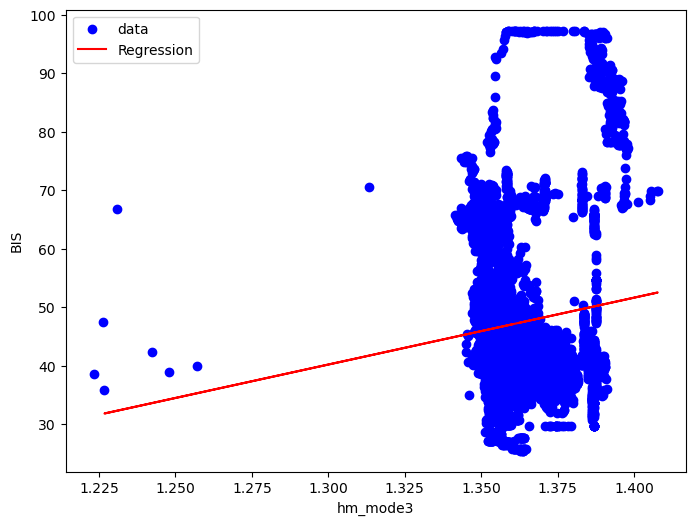

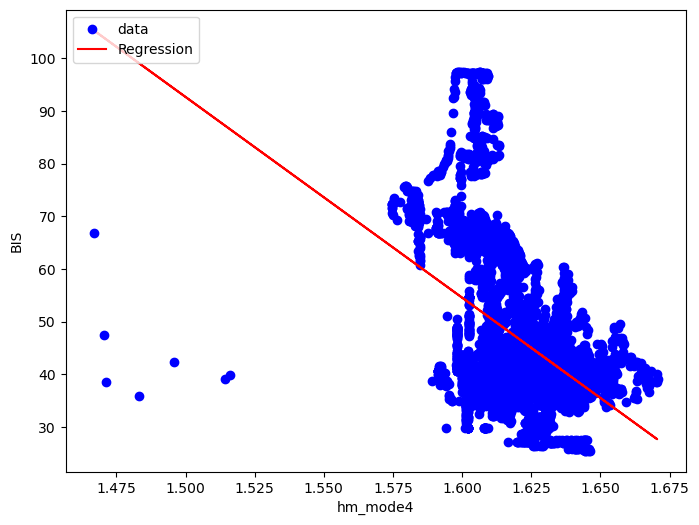

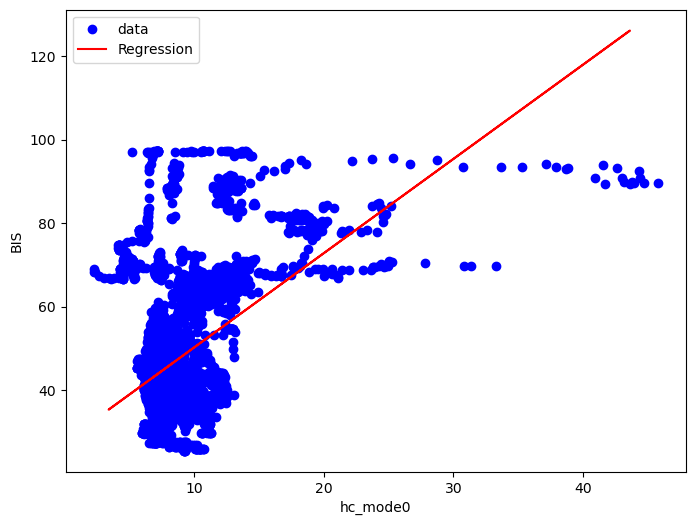

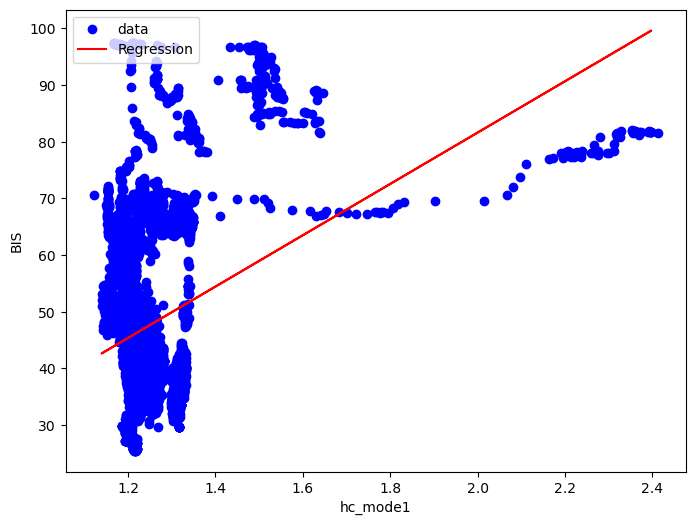

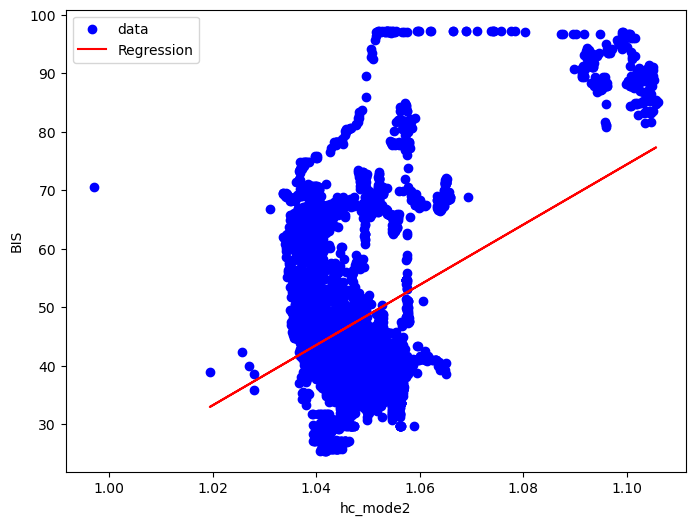

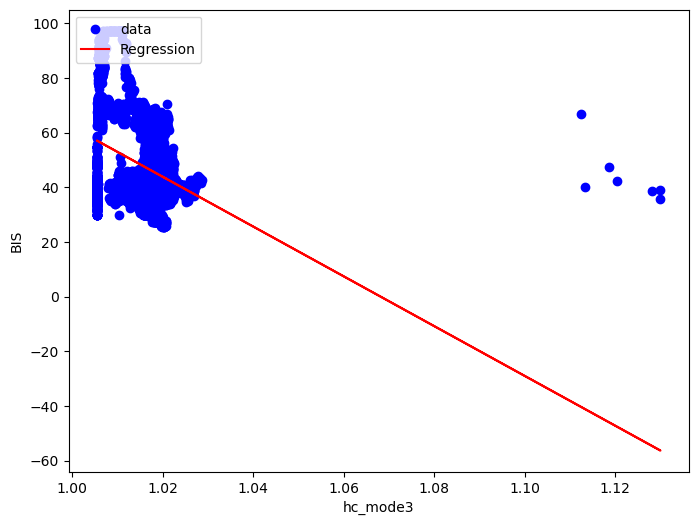

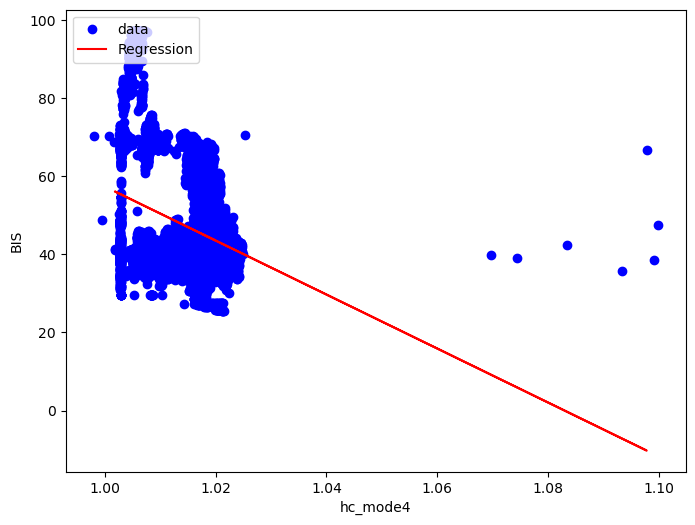

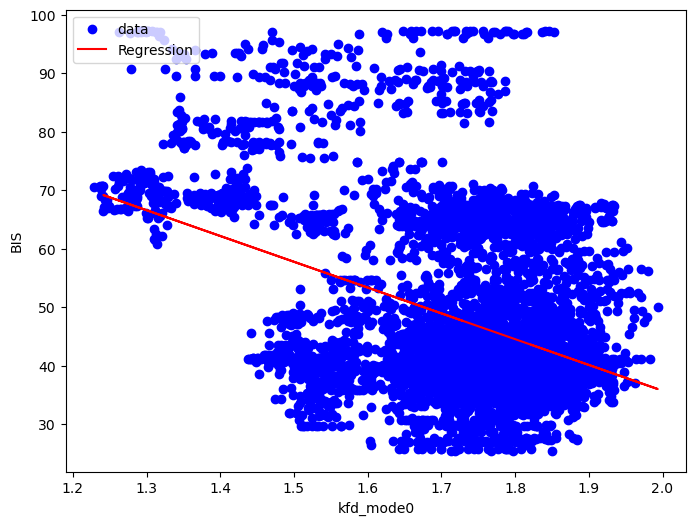

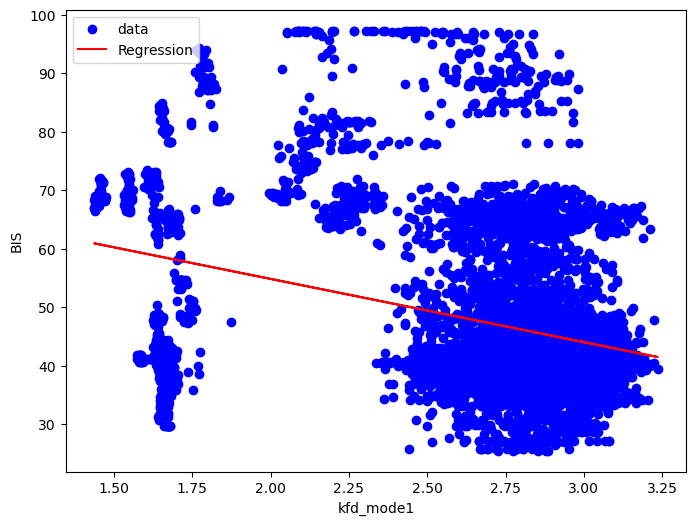

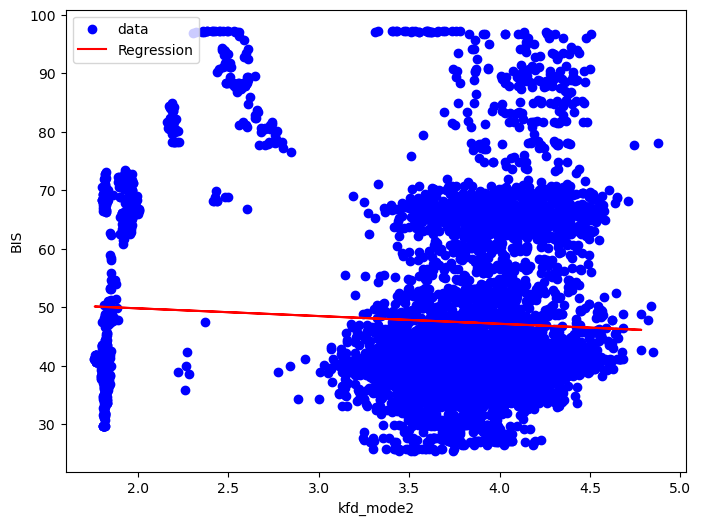

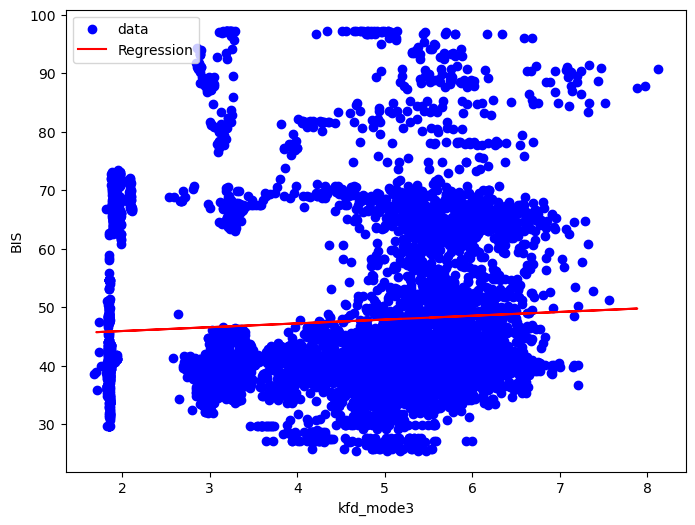

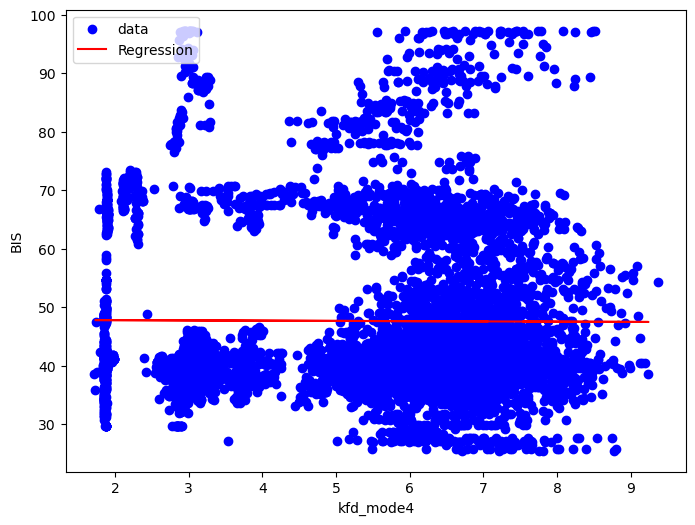

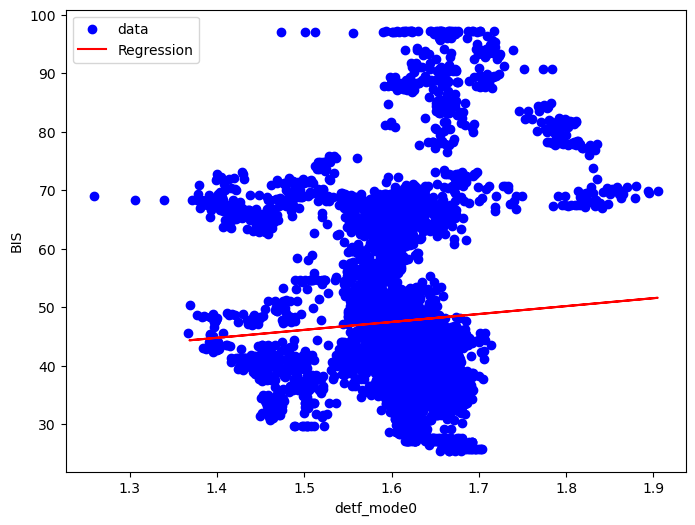

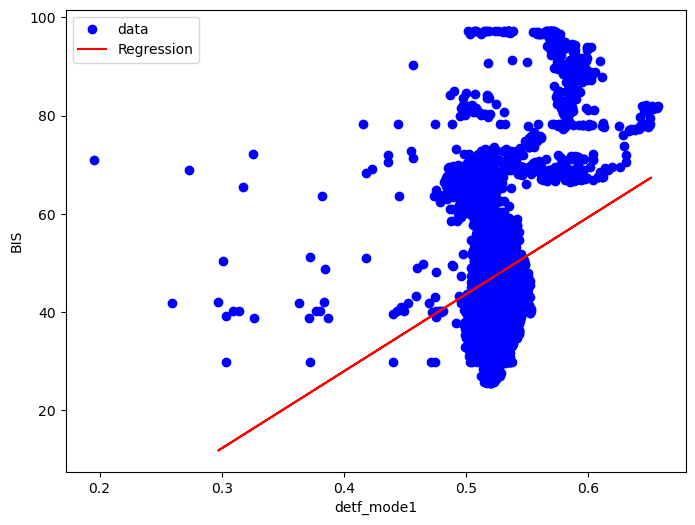

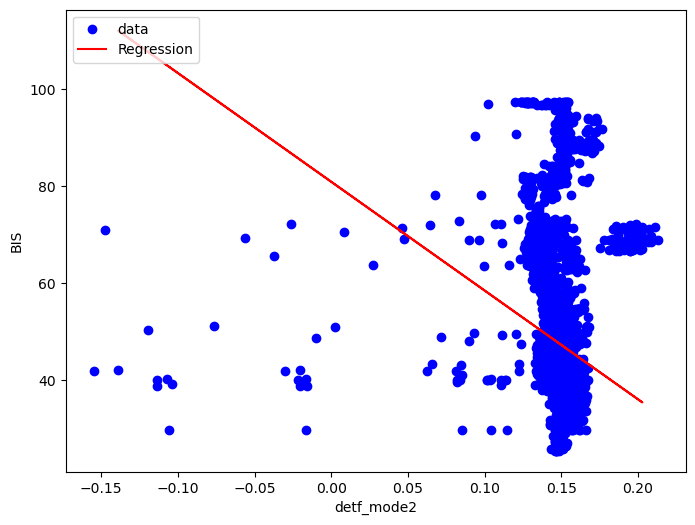

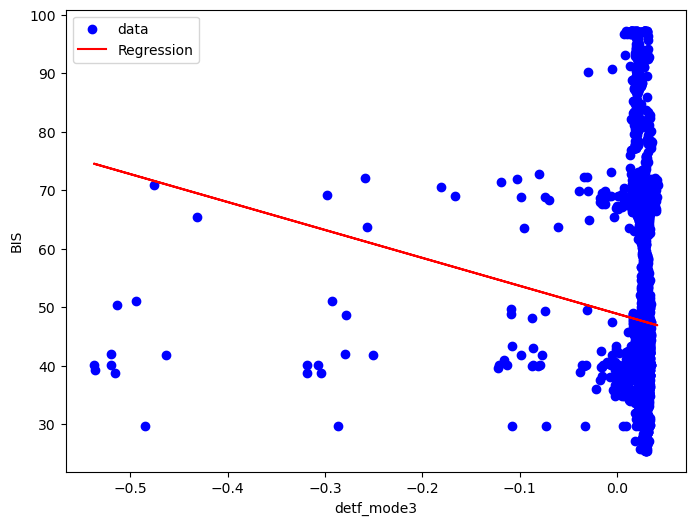

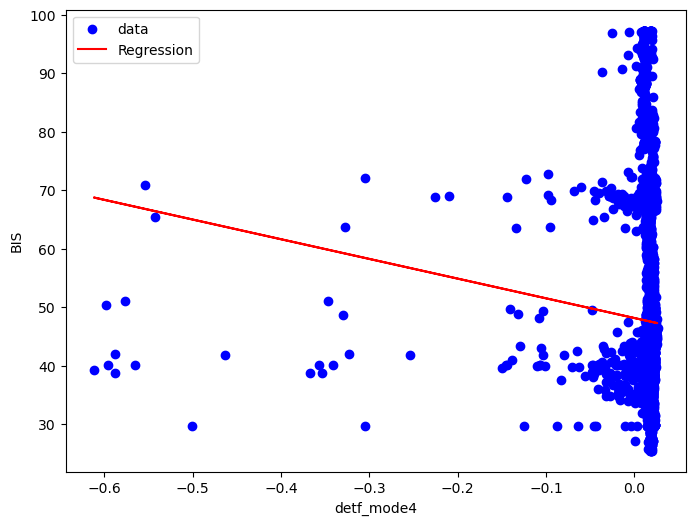

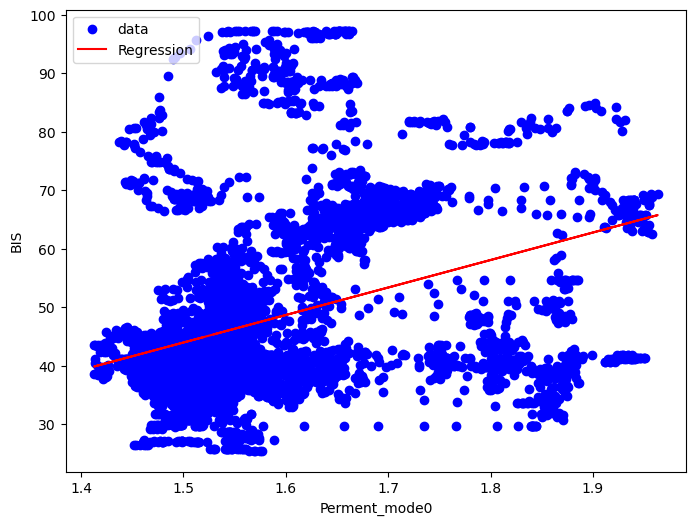

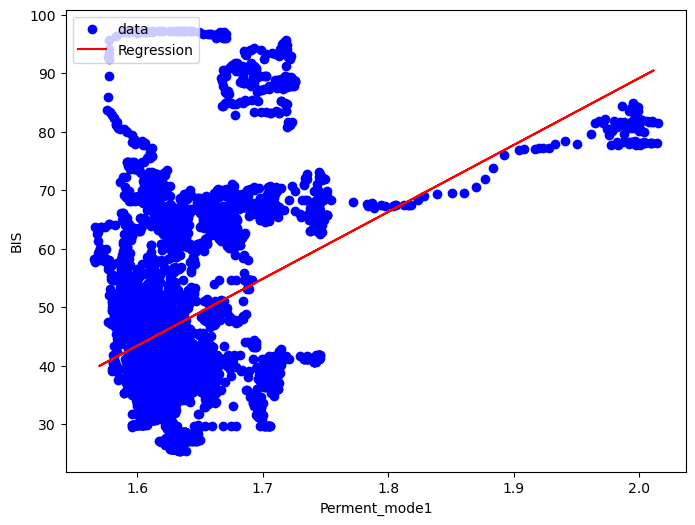

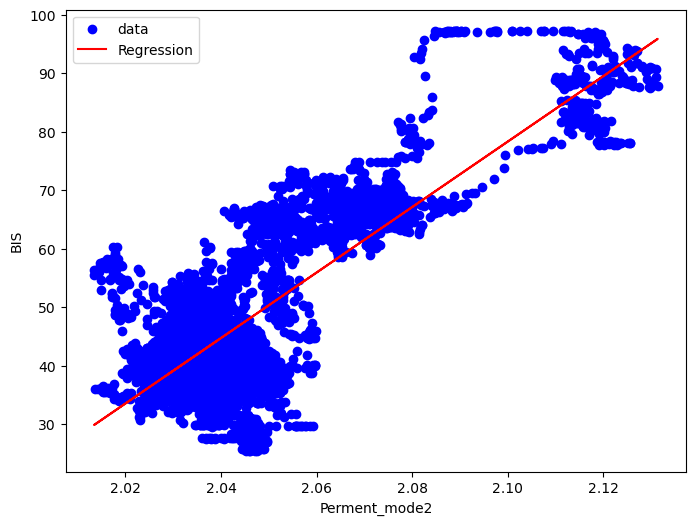

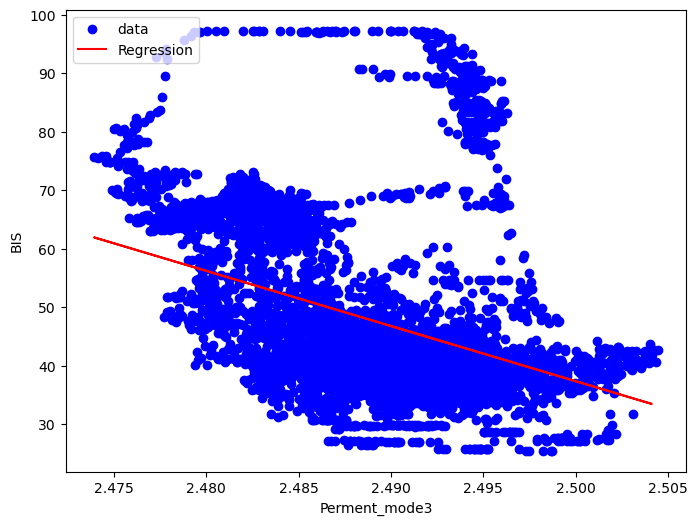

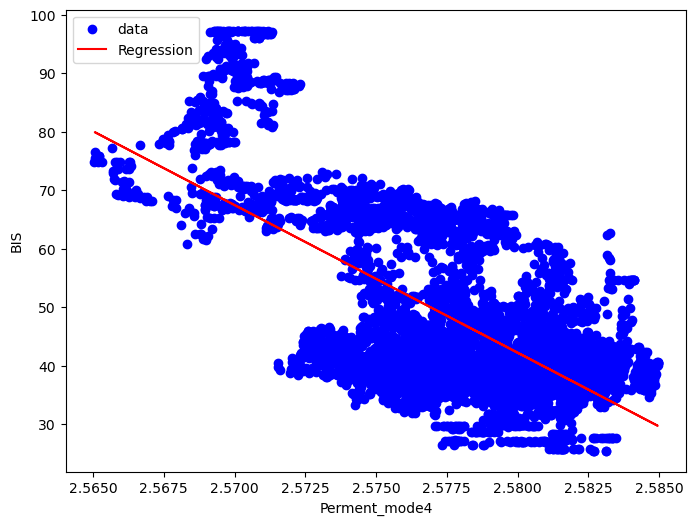

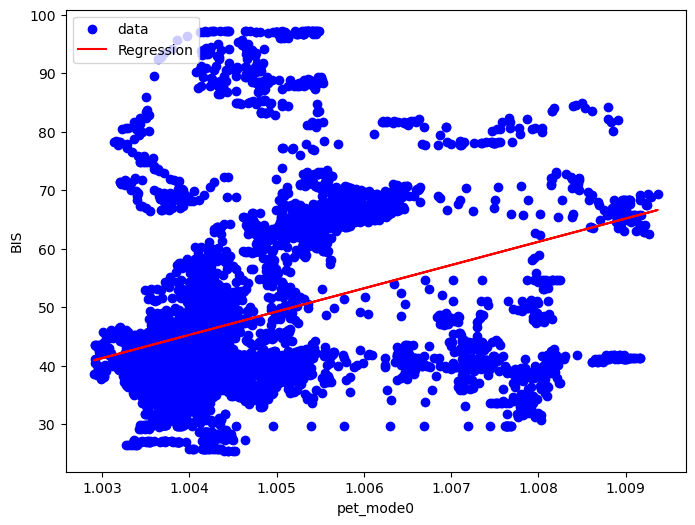

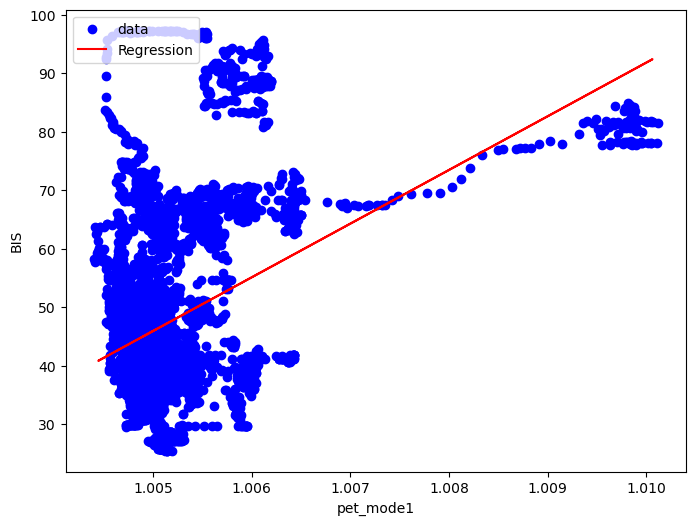

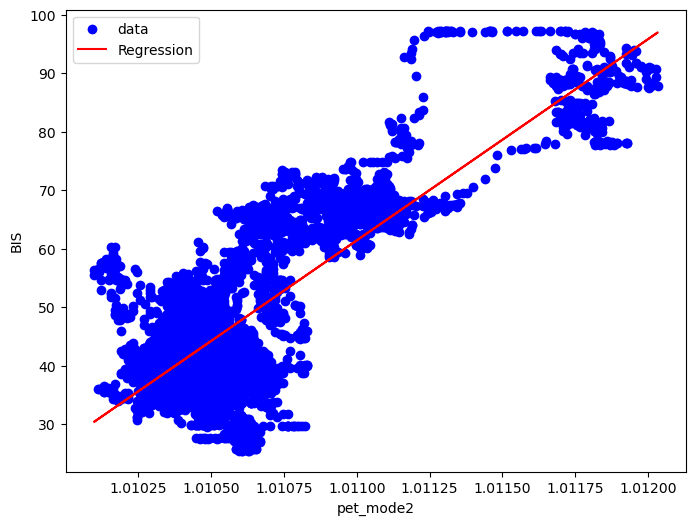

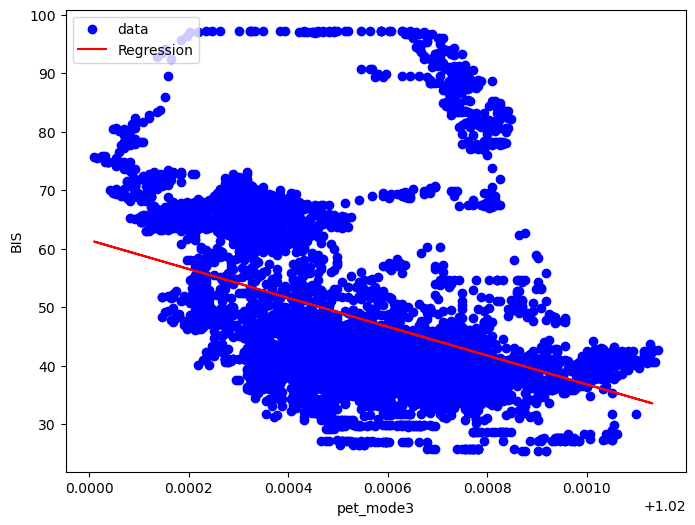

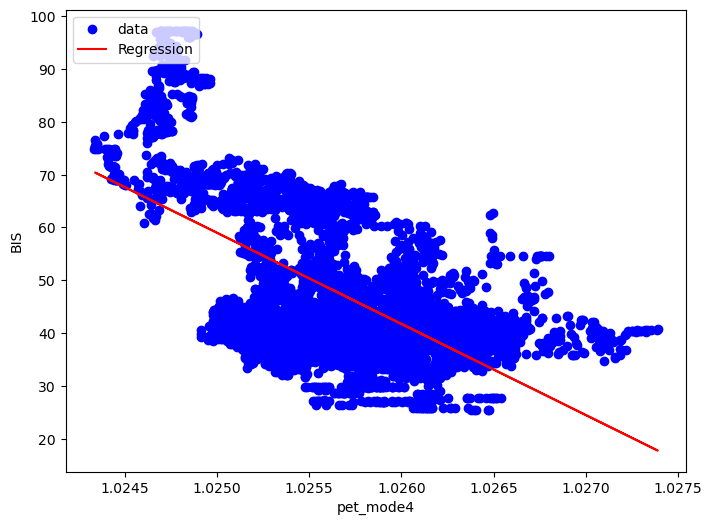

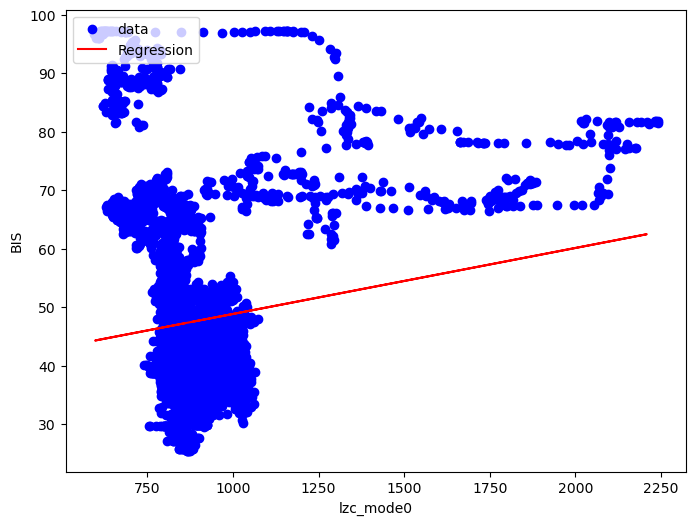

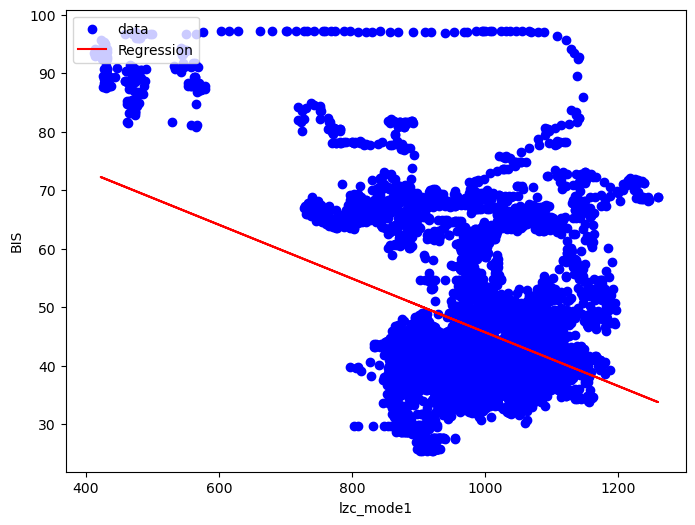

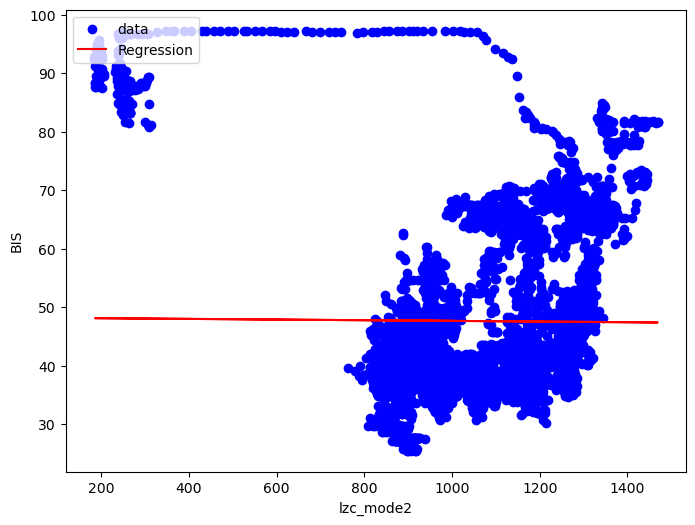

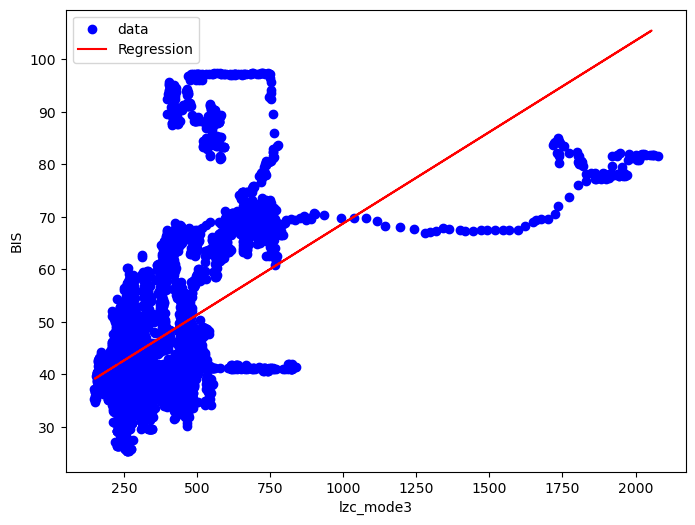

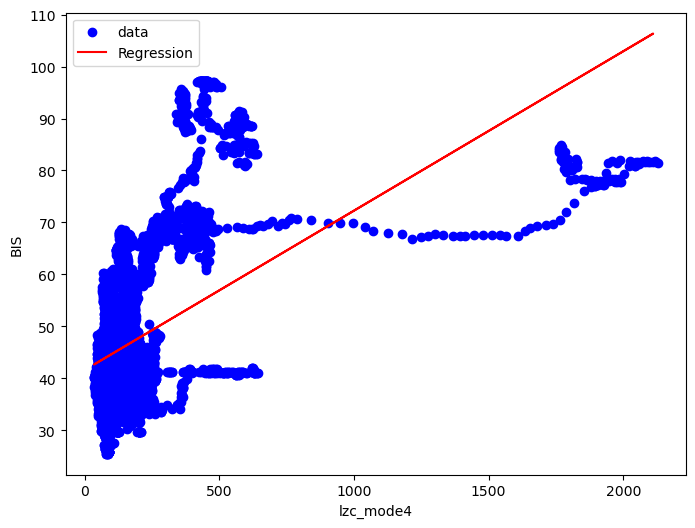

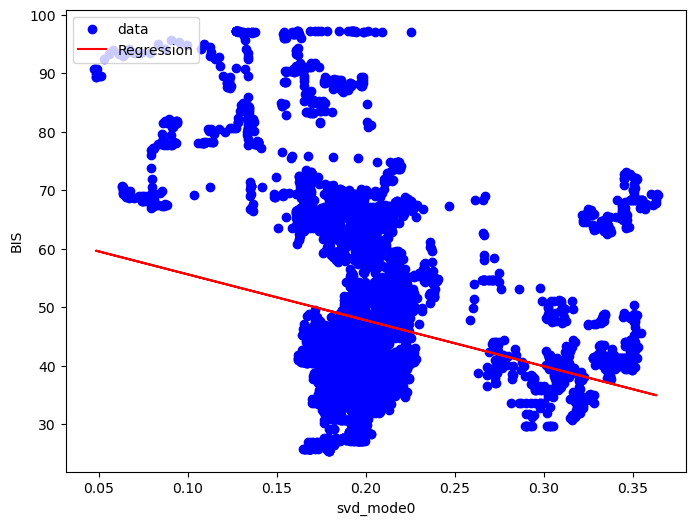

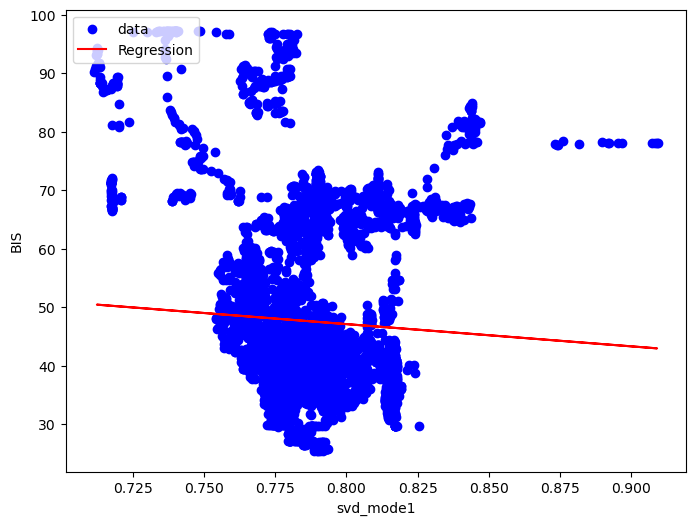

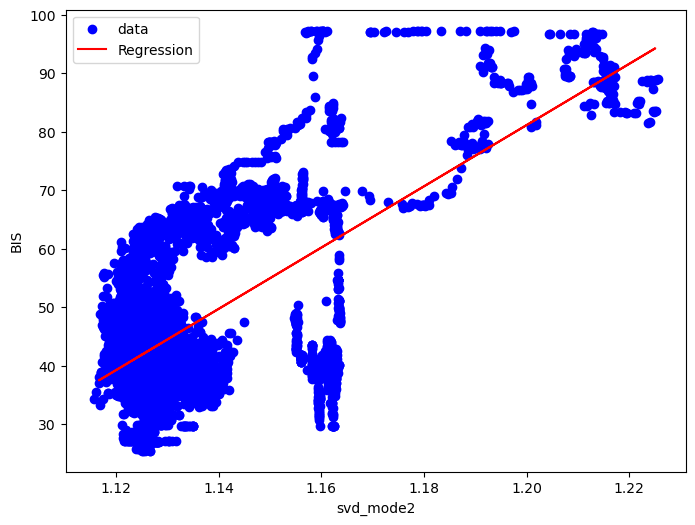

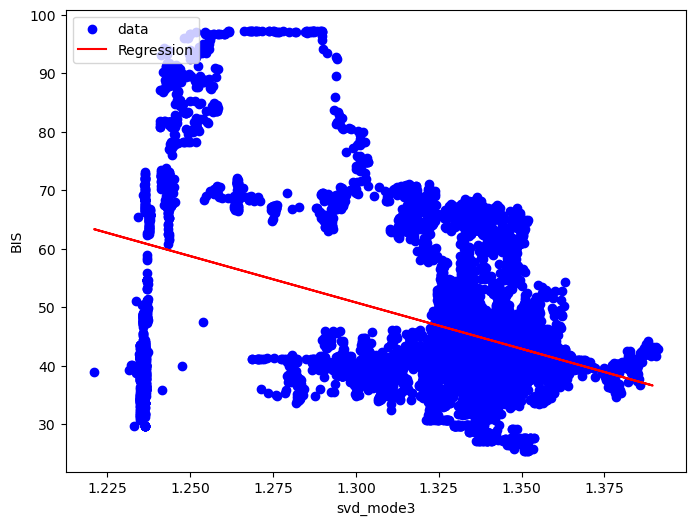

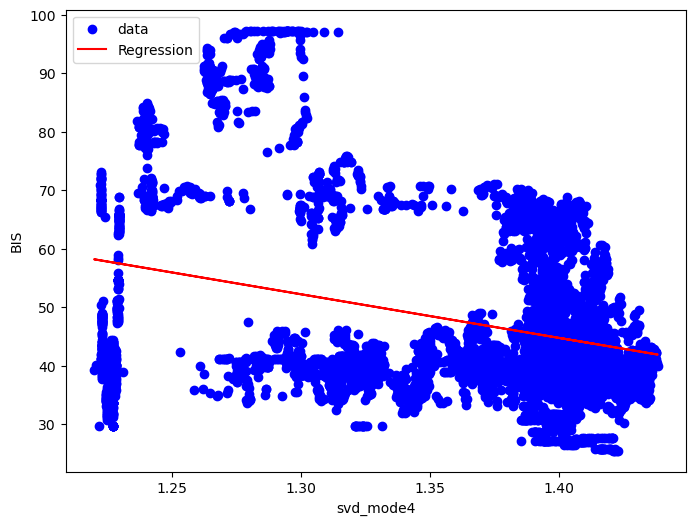

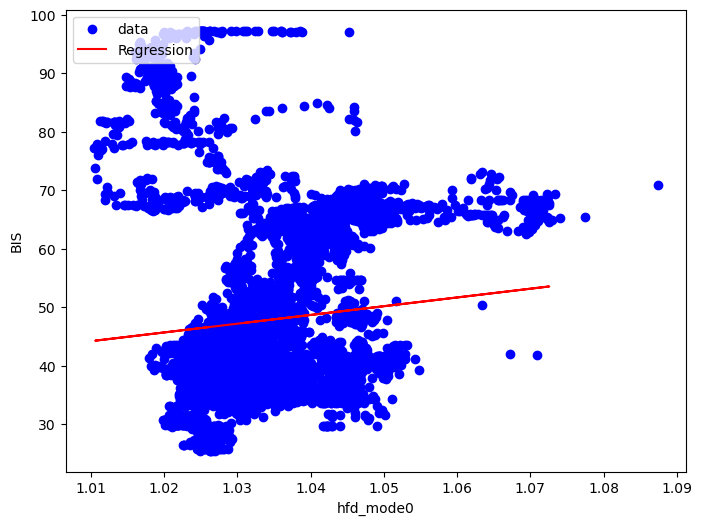

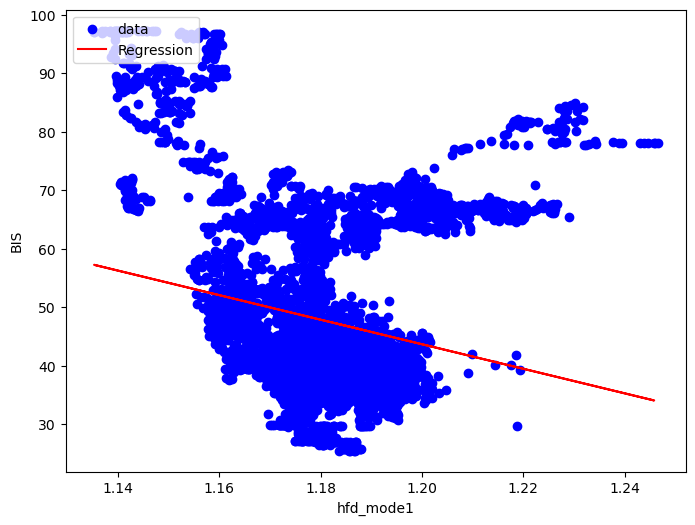

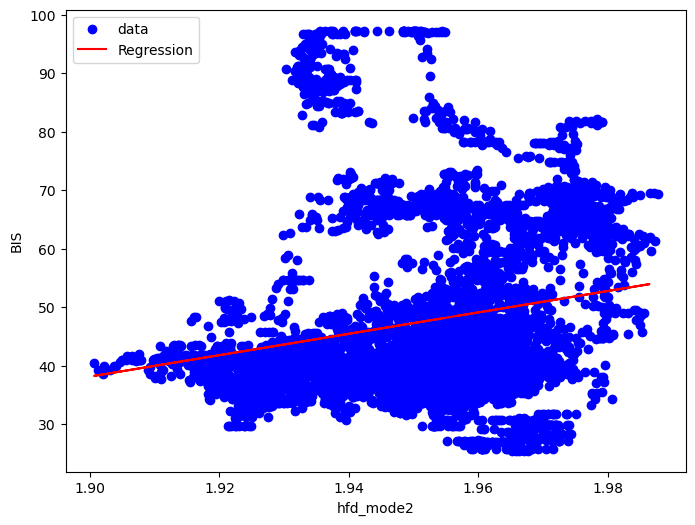

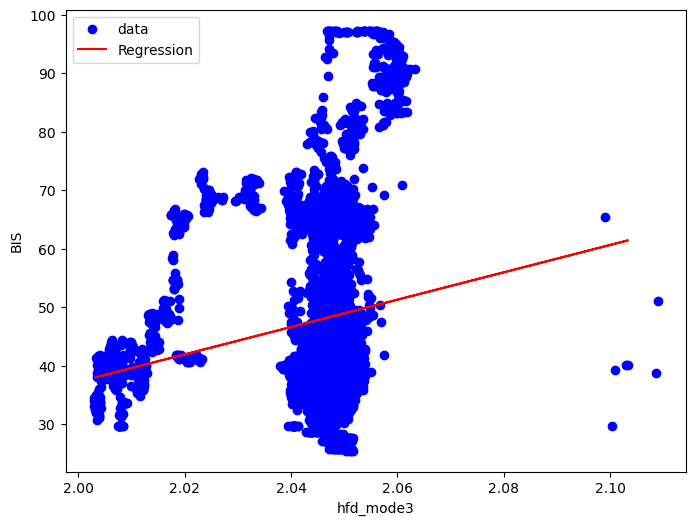

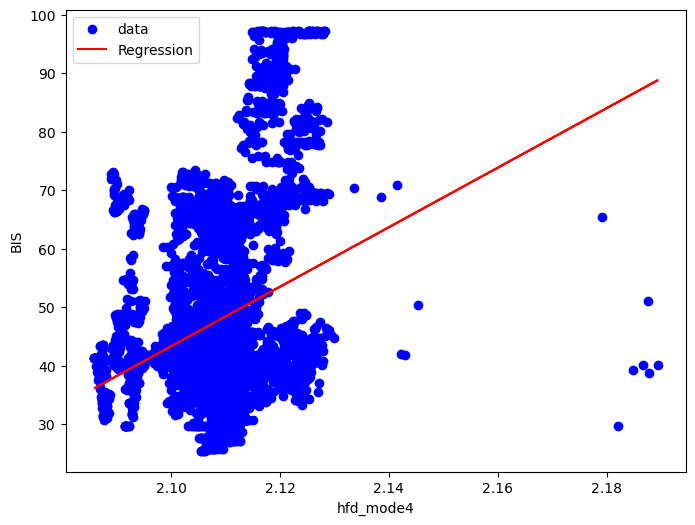

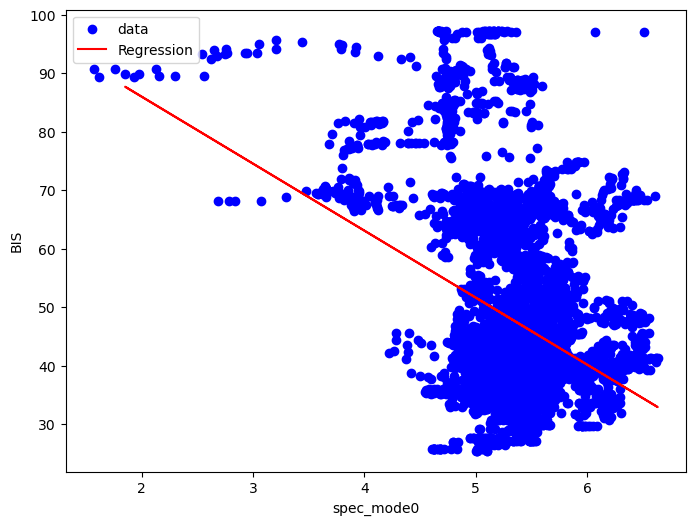

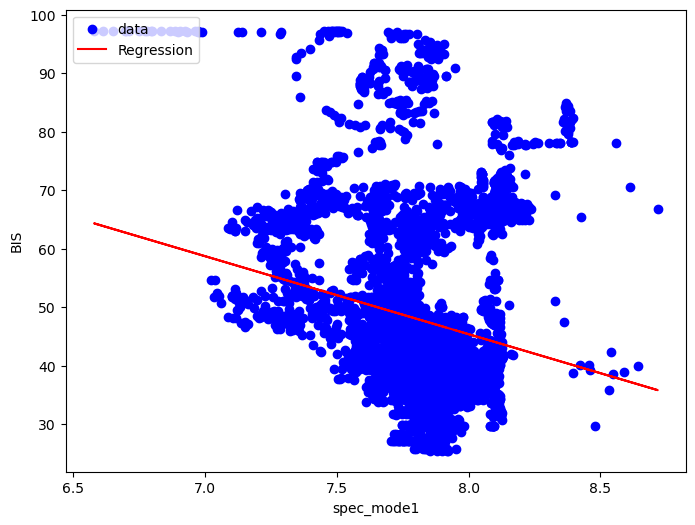

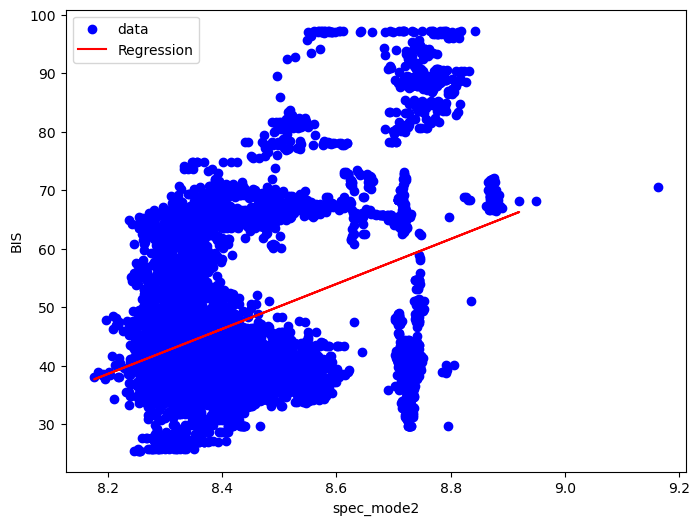

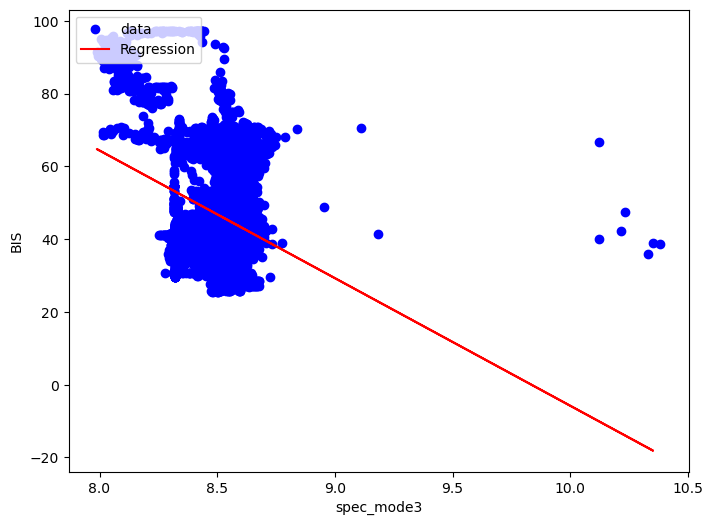

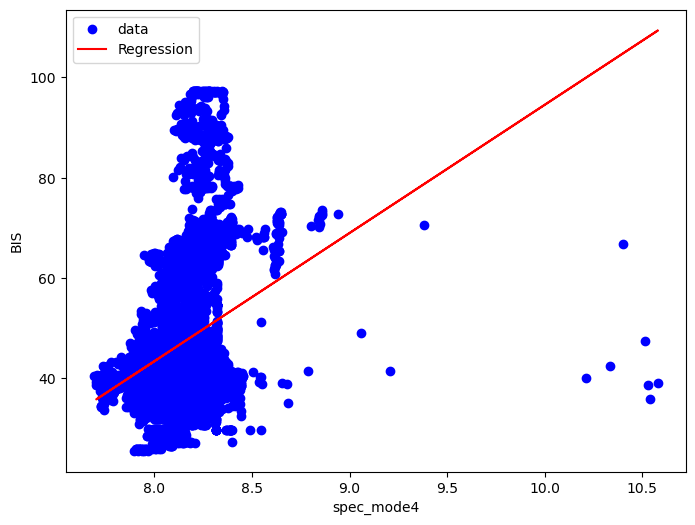

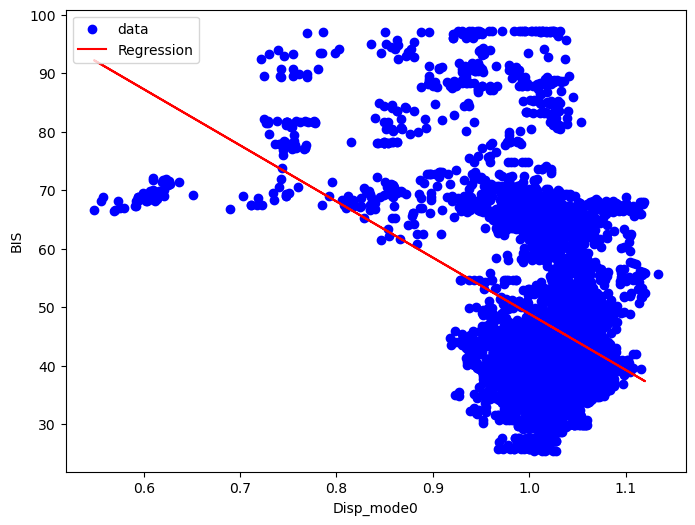

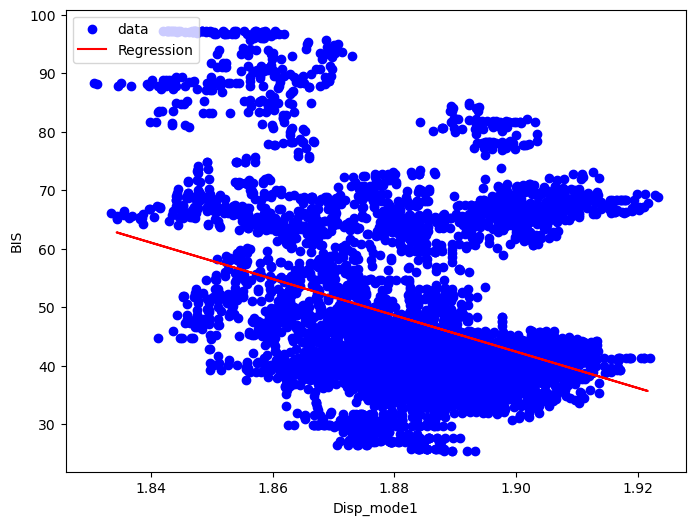

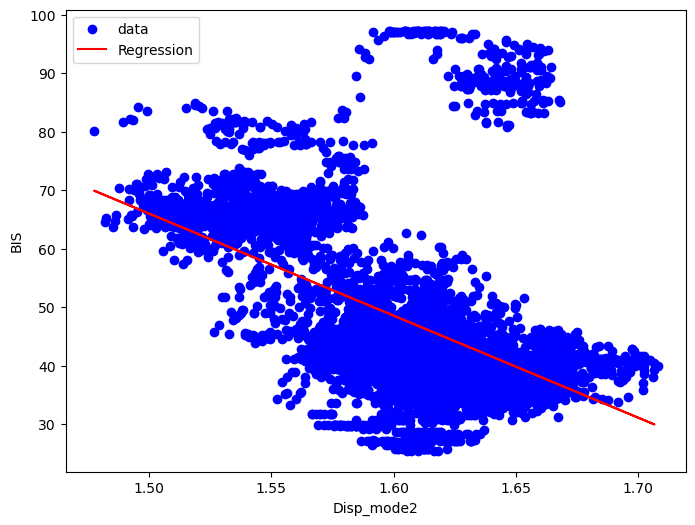

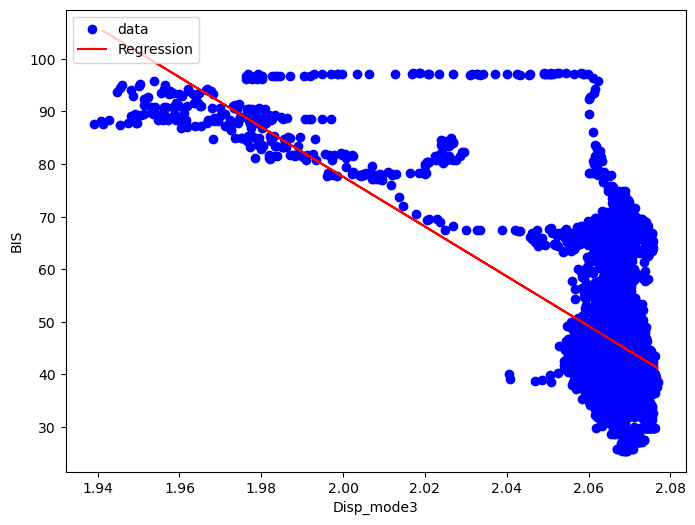

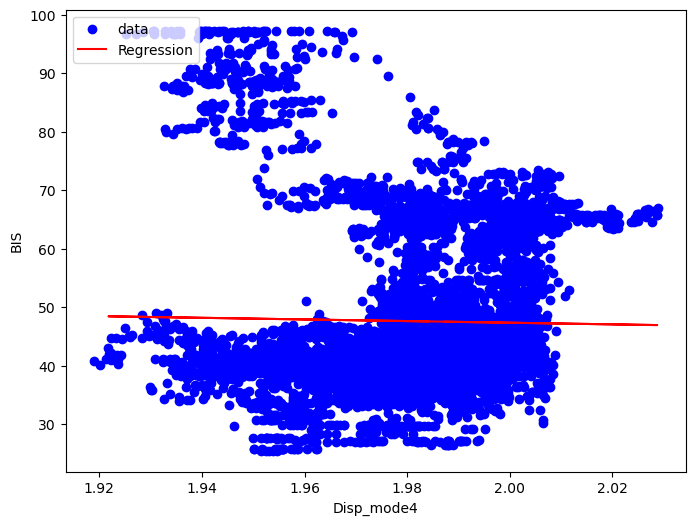

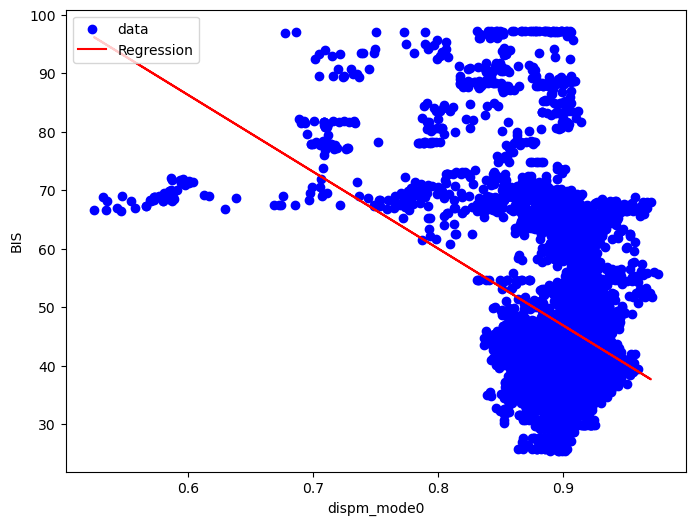

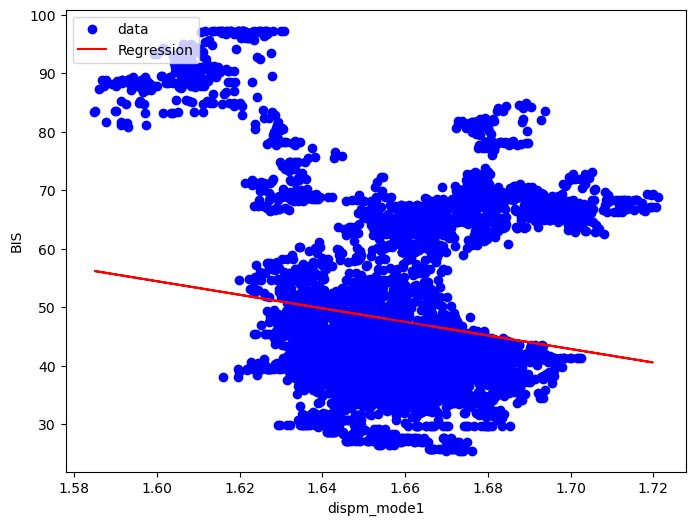

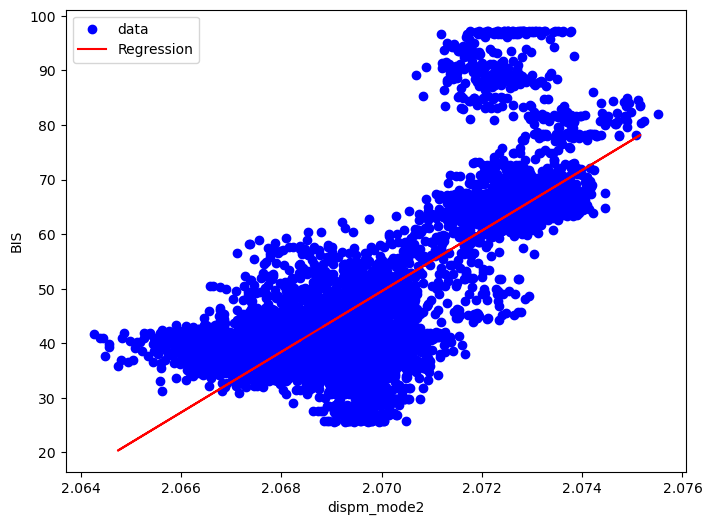

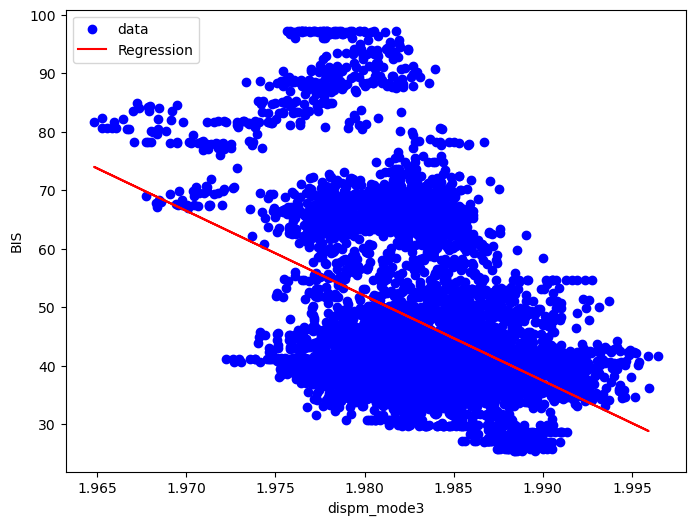

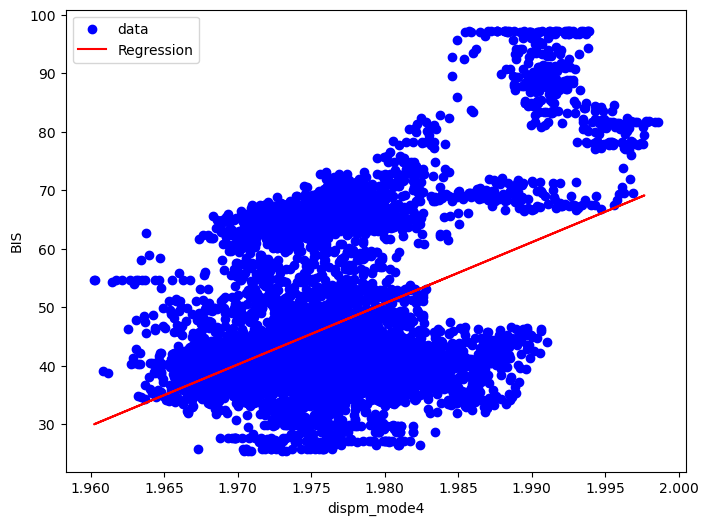

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
27,pet_mode2_r2,66.755165
22,Perment_mode2_r2,66.548126
57,dispm_mode2_r2,54.133265
2,hm_mode2_r2,50.047307
37,svd_mode2_r2,41.031575
24,Perment_mode4_r2,40.441624
33,lzc_mode3_r2,34.270404
53,Disp_mode3_r2,32.973419
29,pet_mode4_r2,31.806013
34,lzc_mode4_r2,27.004104


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
57    dispm_mode2    0.735313
22  Perment_mode2    0.041707
41      hfd_mode1    0.034336
27      pet_mode2    0.025319
56    dispm_mode1    0.016790
52     Disp_mode2    0.015405
4        hm_mode4    0.011781
32      lzc_mode2    0.010796
33      lzc_mode3    0.008187
6        hc_mode1    0.007254
37      svd_mode2    0.007007
7        hc_mode2    0.005424
3        hm_mode3    0.004419
54     Disp_mode4    0.004201
29      pet_mode4    0.003625
24  Perment_mode4    0.003575
58    dispm_mode3    0.003283
31      lzc_mode1    0.003077
2        hm_mode2    0.002803
34      lzc_mode4    0.002637
8        hc_mode3    0.002606
44      hfd_mode4    0.002428
49     spec_mode4    0.002405
53     Disp_mode3    0.002304
20  Perment_mode0    0.002281
40      hfd_mode0    0.002209
16     detf_mode1    0.002072
51     Disp_mode1    0.001999
36      svd_mode1    0.001996
1        hm_mode1    0.001843
23  Perment_mode3    0.001829
21  Perment_mode1    0.001823
42      hf